<a href="https://colab.research.google.com/github/Chris-Raddatz/BIOF-475-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Loads the diabetes-dataset.csv Download diabetes-dataset.csv  CSV using Pandas. Delete the rows with unrealistic entries (For example, some subjects have zero Glucose, zero BloodPressure, zero SkinThickness, zero Insulin, or zero BMI)

In [183]:
df = pd.read_csv('/content/diabetes-dataset.csv')

In [184]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [185]:
df.isnull().value_counts() #So there are no null values, but we still need to remove the illogical data. 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      2000
dtype: int64

In [186]:
for i in df.columns[1:8]:
  df[i].replace(to_replace = 0, value = np.NaN, inplace = True)
  print(df[i].isnull().value_counts())
df.dropna(inplace = True)

False    1987
True       13
Name: Glucose, dtype: int64
False    1910
True       90
Name: BloodPressure, dtype: int64
False    1427
True      573
Name: SkinThickness, dtype: int64
False    1044
True      956
Name: Insulin, dtype: int64
False    1972
True       28
Name: BMI, dtype: int64
False    2000
Name: DiabetesPedigreeFunction, dtype: int64
False    2000
Name: Age, dtype: int64


Our dataset is pretty much cut in half, but this will help produce better results.

2. Splits the data into a training, validation, and test set using "train_test_split" function, with the training containing 80% of the observations and the validation and test sets each containing 10% of the observations

In [187]:
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 0)

In [188]:
df_test, df_validation = train_test_split(df_test, train_size = 0.5, random_state = 0)

3. Plots a histogram of the Age column for the training data

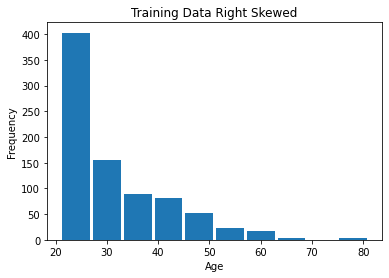

In [230]:
df_train['Age'].plot.hist(rwidth = 0.9)
plt.title('Training Data Right Skewed')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

4. Computes and plots the sample correlation matrix for all columns of the training data

In [190]:
float_set = df.to_numpy(dtype = np.float32) 

In [191]:
cor_samples = np.corrcoef(float_set, rowvar = False)
cor_samples

array([[ 1.        ,  0.18327215,  0.19195148,  0.10451226,  0.07541846,
        -0.02396266,  0.02501807,  0.6613585 ,  0.26472192],
       [ 0.18327215,  1.        ,  0.18287606,  0.22131056,  0.56063519,
         0.21839787,  0.1303609 ,  0.30697425,  0.52160714],
       [ 0.19195148,  0.18287606,  1.        ,  0.25344176,  0.09890688,
         0.30453201,  0.00980085,  0.30566614,  0.21238242],
       [ 0.10451226,  0.22131056,  0.25344176,  1.        ,  0.20503196,
         0.64509235,  0.16032599,  0.20354493,  0.26747505],
       [ 0.07541846,  0.56063519,  0.09890688,  0.20503196,  1.        ,
         0.25326607,  0.13467925,  0.14275534,  0.29171177],
       [-0.02396266,  0.21839787,  0.30453201,  0.64509235,  0.25326607,
         1.        ,  0.15176182,  0.07855708,  0.24712905],
       [ 0.02501807,  0.1303609 ,  0.00980085,  0.16032599,  0.13467925,
         0.15176182,  1.        ,  0.10508547,  0.18597341],
       [ 0.6613585 ,  0.30697425,  0.30566614,  0.20354493,  0

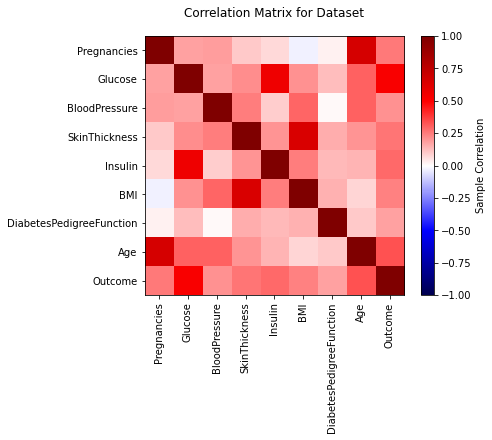

In [192]:
import matplotlib.pyplot as plt
xs = list(range(len(df_train.columns)))

fig = plt.figure()
ax = fig.add_axes([.1,.2,.8,.9])
cax = ax.matshow(cor_samples, cmap = "seismic", vmax = 1.0, vmin = -1.0)
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel("Sample Correlation")
ax.xaxis.set_ticks_position("bottom")
ax.set_xticks(xs)
ax.set_xticklabels(df_train.columns, rotation = 90)
ax.set_yticks(xs)
ax.set_yticklabels(df_train.columns)
plt.title("Correlation Matrix for Dataset")
plt.show()

5. a) Performs PCA using all of the columns except the 'Outcome' column

In [193]:
X_train = df_train[df_train.columns[:-1]].to_numpy()

In [194]:
X_train

array([[  3.   , 103.   ,  72.   , ...,  27.6  ,   0.73 ,  27.   ],
       [  3.   , 187.   ,  70.   , ...,  36.4  ,   0.408,  36.   ],
       [  6.   , 151.   ,  62.   , ...,  35.5  ,   0.692,  28.   ],
       ...,
       [  5.   , 189.   ,  64.   , ...,  31.2  ,   0.583,  29.   ],
       [  2.   ,  68.   ,  62.   , ...,  20.1  ,   0.257,  23.   ],
       [  1.   , 109.   ,  56.   , ...,  25.2  ,   0.833,  23.   ]])

In [195]:
X_train_mean = X_train.mean(axis = 0)
X_train_std = X_train.std(axis = 0)
X_train_z = (X_train - X_train_mean) / X_train_std

In [196]:
pca = PCA()

In [197]:
X_train_pca = pca.fit_transform(X_train_z)

In [198]:
pca.explained_variance_ratio_

array([0.3133072 , 0.18912743, 0.15029323, 0.11820562, 0.09351485,
       0.05427629, 0.04237673, 0.03889865])

5. b) finds the number of components to use using a Scree Plot and the "elbow" method

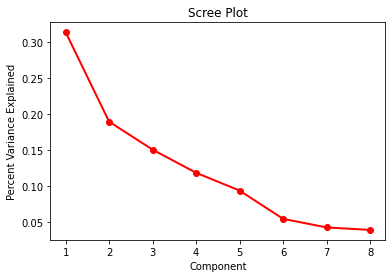

In [199]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Component')
plt.xticks(pc_values)
plt.ylabel('Percent Variance Explained')
plt.show()

The number of components needed is most likely 5, as at 6 the components really start to level off in contribution to the variance. I also found some rule that if your Scree plot doesn't have an easily identifiable elbow pick up to the number of components to where the variance ~80%.

6. Using PCA and number of selected components in the previous problem, uses K-Means clustering, the Inertia Plot, and the "elbow" method to find the number of clusters in the training data

In [200]:
pca_5 = PCA(n_components = 5)

In [201]:
X_train_pca5 = pca_5.fit_transform(X_train_z)

In [202]:
inertias = []
ks = []
for k in range(1,11):
  ks.append(k)
  print('K=' + str(k))
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X_train_pca5)
  print('inertia = ' + str(kmeans.inertia_), '\n')
  inertias.append(kmeans.inertia_)

K=1
inertia = 5726.105803103319 

K=2
inertia = 4284.034443520831 

K=3
inertia = 3554.856487812366 

K=4
inertia = 3120.465613705129 

K=5
inertia = 2864.630222102595 

K=6
inertia = 2664.8206109539638 

K=7
inertia = 2489.427967608347 

K=8
inertia = 2326.361446718931 

K=9
inertia = 2177.5645401330553 

K=10
inertia = 2074.24645081541 



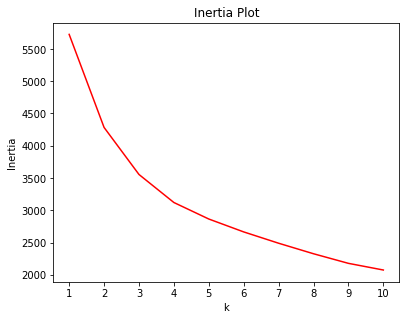

In [203]:
xs = np.array(list(range(len(ks))))
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
ax.plot(xs, inertias, 'r-')
ax.set_xticks(xs)
ax.set_xticklabels(ks)
ax.set_xlabel('k')
ax.set_ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()

I believe the moment the curve becomes non-linear is at k = 3, this is also where the slope starts to drop off tremendously.

In [204]:
KMeans_3 = KMeans(n_clusters = 3)
means = KMeans_3.fit(X_train_pca5).cluster_centers_

In [205]:
means

array([[ 1.50990612,  1.51363758, -0.26969614,  0.1227981 ,  0.20631745],
       [ 0.91425905, -1.21090781, -0.09730175, -0.1441753 ,  0.0566653 ],
       [-1.32233077,  0.06709792,  0.19298486,  0.03551567, -0.13600008]])

7. a) Trains a Linear Regression model using the training data to predict 'BMI' from z-scored 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'Age', 

In [206]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [207]:
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1101,3,103.0,72.0,30.0,152.0,27.6,0.730,27,0
1205,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
295,6,151.0,62.0,31.0,120.0,35.5,0.692,28,0
1545,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
1472,1,143.0,74.0,22.0,61.0,26.2,0.256,21,0
...,...,...,...,...,...,...,...,...,...
540,8,100.0,74.0,40.0,215.0,39.4,0.661,43,1
1474,3,173.0,84.0,33.0,474.0,35.7,0.258,22,1
1613,5,189.0,64.0,33.0,325.0,31.2,0.583,29,1
1074,2,68.0,62.0,13.0,15.0,20.1,0.257,23,0


In [208]:
features_train = df_train.drop(columns = ['BMI', 'DiabetesPedigreeFunction', 'Outcome'])
features_validation = df_validation.drop(columns = ['BMI', 'DiabetesPedigreeFunction', 'Outcome'])
features_test = df_test.drop(columns = ['BMI', 'DiabetesPedigreeFunction', 'Outcome'])

In [209]:
features_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age
1101,3,103.0,72.0,30.0,152.0,27
1205,3,187.0,70.0,22.0,200.0,36
295,6,151.0,62.0,31.0,120.0,28
1545,1,139.0,62.0,41.0,480.0,21
1472,1,143.0,74.0,22.0,61.0,21
...,...,...,...,...,...,...
540,8,100.0,74.0,40.0,215.0,43
1474,3,173.0,84.0,33.0,474.0,22
1613,5,189.0,64.0,33.0,325.0,29
1074,2,68.0,62.0,13.0,15.0,23


In [210]:
x_train = features_train.to_numpy()
y_train = df_train['BMI'].to_numpy()

In [211]:
x_train_z = (x_train-x_train.mean(axis = 0, keepdims = True))/x_train.std(axis = 0, keepdims = True)

In [212]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_z, y_train)

LinearRegression()

In [213]:
y_pred_train = model.predict(x_train_z)

7. b) computes the Mean Squared Error (MSE) and correlation between the model's predictions and the actual 'BMI' values for the training data, validation data, and test data

In [214]:
x_validation = features_validation.to_numpy()
y_validation = df_validation['BMI'].to_numpy()

x_validation_z = (x_validation-x_validation.mean(axis = 0, keepdims = True))/x_validation.std(axis = 0, keepdims = True)

y_pred_validation = model.predict(x_validation_z)

x_test = features_test.to_numpy()
y_test = df_test['BMI'].to_numpy()

x_test_z = (x_test-x_test.mean(axis = 0, keepdims = True))/x_test.std(axis = 0, keepdims = True)

y_pred_test = model.predict(x_test_z)

In [231]:
from sklearn.metrics import mean_squared_error
print("Mean squared error for training set:", round(mean_squared_error(y_train, y_pred_train), 2))
print("Mean squared error for validation set:", round(mean_squared_error(y_validation, y_pred_validation), 2))
print("Mean squared error for testing set:", round(mean_squared_error(y_test, y_pred_test), 2))

Mean squared error for training set: 26.27
Mean squared error for validation set: 34.2
Mean squared error for testing set: 26.45


7. c) plots the betas of for the trained Linear Regression model

In [216]:
model.coef_

array([-0.85168396,  0.15896451,  1.21980713,  4.13879686,  0.75923769,
       -0.0800282 ])

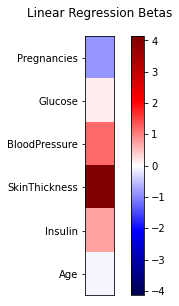

In [217]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cmax = np.abs(model.coef_).max()
cax = ax.matshow(np.reshape(model.coef_, [-1,1]), cmap = 'seismic', aspect = '1.5', vmax = cmax, vmin = -1 * cmax)
fig.colorbar(cax)
ax.set_yticks(list(range(len(features_train.columns))))
ax.set_yticklabels(features_train.columns)
ax.set_xticks([])
plt.title('Linear Regression Betas')
plt.show()

8. a) Finds the best L2 regularization strength for a Logistic Regression model, with z-scoring, that predicts 'Outcome' from all of the other variables using the training and validation data,

In [218]:
features = [x for x in df_train.columns if x!= 'Outcome']

In [219]:
X_train_logistic = df_train[features].to_numpy(dtype = np.float32)
y_train_logistic = df_train['Outcome'].to_numpy()
X_validation_logistic = df_validation[features].to_numpy(dtype = np.float32)
y_validation_logistic = df_validation['Outcome'].to_numpy()

In [220]:
X_train_logistic_z = (X_train_logistic-X_train_logistic.mean(axis = 0, keepdims = True))/X_train_logistic.std(axis = 0, keepdims = True)
X_validation_logistic_z = (X_validation_logistic-X_validation_logistic.mean(axis = 0, keepdims = True))/X_validation_logistic.std(axis = 0, keepdims = True)

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
for c in [np.inf, 1000,100,10,1,0.1,0.01,0.001,0.0001]:
  print("C= " + str(c))
  if c == np.inf:
    model_logic = LogisticRegression(max_iter = 10000, penalty = 'none')
  else:
    model_logic = LogisticRegression(max_iter = 10000, solver = 'liblinear', penalty = 'l2', C = c)
  model_logic.fit(X_train_logistic_z, y_train_logistic)
  y_train_preds = model_logic.predict(X_train_logistic_z)
  print("Train Validation Accuracy:")
  print(np.equal(y_train_preds, y_train_logistic).mean())
  print("Test Validation Accuracy:")
  validation = np.equal(model_logic.predict(X_validation_logistic_z), y_validation_logistic).mean()
  print(validation,"\n")

C= inf
Train Validation Accuracy:
0.788647342995169
Test Validation Accuracy:
0.7692307692307693 

C= 1000
Train Validation Accuracy:
0.788647342995169
Test Validation Accuracy:
0.7692307692307693 

C= 100
Train Validation Accuracy:
0.788647342995169
Test Validation Accuracy:
0.7692307692307693 

C= 10
Train Validation Accuracy:
0.788647342995169
Test Validation Accuracy:
0.7692307692307693 

C= 1
Train Validation Accuracy:
0.7874396135265701
Test Validation Accuracy:
0.7692307692307693 

C= 0.1
Train Validation Accuracy:
0.783816425120773
Test Validation Accuracy:
0.75 

C= 0.01
Train Validation Accuracy:
0.788647342995169
Test Validation Accuracy:
0.7980769230769231 

C= 0.001
Train Validation Accuracy:
0.7608695652173914
Test Validation Accuracy:
0.75 

C= 0.0001
Train Validation Accuracy:
0.7536231884057971
Test Validation Accuracy:
0.75 



Although C = 0.01 does have a slightly higher training accuracy, which may be overfitting, it has the highest validation accuracy by a significant amount compared to the differences among the other C values, so let's go with 0.01

8. b) computes the accuracy of the best model determined from (a) on the test data

In [223]:
X_test_logistic = df_test[features].to_numpy(dtype = np.float32)
y_test_logistic = df_test['Outcome'].to_numpy()

In [224]:
X_test_logistic_z = (X_test_logistic-X_test_logistic.mean(axis = 0, keepdims = True))/X_test_logistic.std(axis = 0, keepdims = True)

In [225]:
model_l2 = LogisticRegression(max_iter = 10000, penalty = 'l2', solver = 'liblinear', C = 0.01)
model_l2.fit(X_train_logistic_z, y_train_logistic)
y_logistic_test_pred = model_l2.predict(X_test_logistic_z)

In [226]:
np.equal(y_logistic_test_pred, y_test_logistic).mean()

0.8446601941747572

8. c) plots the betas of the best model based on the train data

In [227]:
model_l2.coef_

array([[0.19912805, 0.55450922, 0.10412443, 0.15450102, 0.12863226,
        0.17605228, 0.17693558, 0.19470487]])

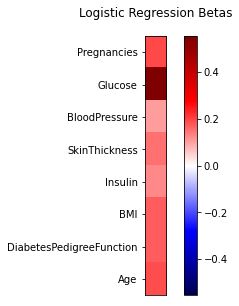

In [228]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])
cmax = np.abs(model_l2.coef_).max()
cax = ax.matshow(np.reshape(model_l2.coef_,[-1,1]), cmap= 'seismic', aspect = '1.5',vmax = cmax, vmin = -1 * cmax)
fig.colorbar(cax)
ax.set_yticks(list(range(len(df.columns[:-1]))))
ax.set_yticklabels(df.columns[:-1])
ax.set_xticks([])
plt.title('Logistic Regression Betas')
plt.show()

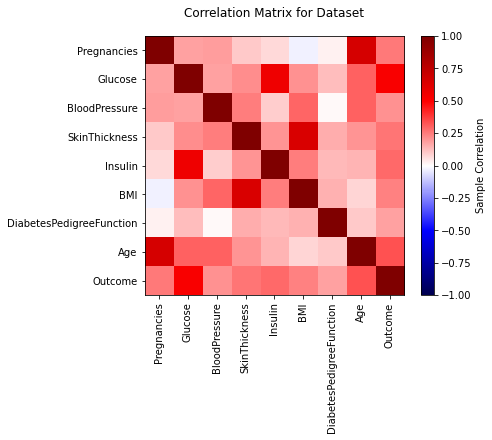

In [229]:
xs = list(range(len(df_train.columns)))

fig = plt.figure()
ax = fig.add_axes([.1,.2,.8,.9])
cax = ax.matshow(cor_samples, cmap = "seismic", vmax = 1.0, vmin = -1.0)
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel("Sample Correlation")
ax.xaxis.set_ticks_position("bottom")
ax.set_xticks(xs)
ax.set_xticklabels(df_train.columns, rotation = 90)
ax.set_yticks(xs)
ax.set_yticklabels(df_train.columns)
plt.title("Correlation Matrix for Dataset")
plt.show()